# Solution 2

##                                                           Tamir Cohen

### Q1

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import time

#### a

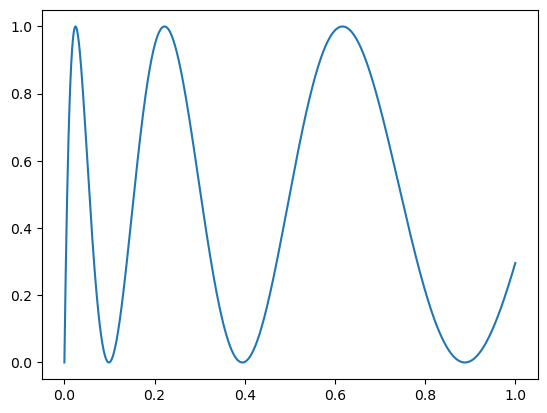

In [5]:
def f(vec):
    return (np.sin(np.sqrt(100*vec))**2)

vec = np.linspace(0,1,1001)
plt.plot(vec,f(vec))
plt.show()

#### b

##### Regurlar trapesoid method

In [6]:
def I_func(dx):
    I = 0
    vec = np.arange(0,1,dx)
    N = len(vec)-1
    
    for n in range(N):
        I += dx/2.0 * (f(vec[n]) + f(vec[n+1]))
    return I
    
def eps(Ii,Iii):
    return np.abs((1/3.0 * (Ii-Iii)))

start_time = time.perf_counter()

dx = vec[-1] - vec[0]
I = 0
eps_val = np.inf
Iii = I_func(dx)
count  = 0
while eps_val>=1e-6:
    count +=1
    dx = dx/2 
    Ii = I_func(dx)
    eps_val = eps(Ii,Iii)
    Iii = Ii
    
end_time = time.perf_counter()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"epsilon {eps_val:.3e} ")
print(f"The operation completed in {elapsed_time:.4f} seconds")
print(f"Area is :{Ii:.6f}")
print(f"dx is :{dx:.4e}")
print(f"Iterations :{count:.0f}")

epsilon 7.530e-07 
The operation completed in 1.4502 seconds
Area is :0.455830
dx is :7.6294e-06
Iterations :17


##### Subintervals method

In [7]:
def I1_f(dx):
    return dx/2.0 * (f(0) + f(dx))

def Ii_f(dx,I_prev):
    N = int(1/dx+1)
    I  = 0.5 * I_prev
    # for i in np.arange(0,N,2):
    I += dx*np.sum(f(0+np.arange(1,N,2)*dx))
    return I

def eps_fun(I,I_prev):
    return np.abs((1/3.0 * (I-I_prev)))

dx = 1
I1 = I1_f(1)
dx = dx/2

I2 = Ii_f(dx,I1)
I_prev = I2
eps_val = eps_fun(I2,I1)
start_time = time.perf_counter()
count  = 0
while eps_val>1e-6:
    count +=1
    dx = dx/2 
    I  = Ii_f(dx,I_prev)
    eps_val = eps_fun(I,I_prev)
    I_prev = I


end_time = time.perf_counter()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"epsilon {eps_val:.3e} ")
print(f"The operation completed in {elapsed_time:.4f} seconds")
print(f"Area is :{I:.6f}")
print(f"dx is :{dx:.4e}")
print(f"Iterations :{count:.0f}")

epsilon 4.740e-07 
The operation completed in 0.0008 seconds
Area is :0.455832
dx is :2.4414e-04
Iterations :11


#### c

In [8]:
def R11_f(dx):
    N = int(1/dx+1)
    vec = np.linspace(0,1,N)
    I = sum(dx/2.0 * (f(vec[:-1]) + f(vec[1:])))
    return I#dx/2.0 * (f(0) + f(dx))

def Ri1_f(dx,I_prev):
    N = int(1/dx+1)
    I  = 0.5 * I_prev
    # for i in np.arange(0,N,2):
    I += dx*np.sum(f(0+np.arange(1,N,2)*dx))
    return I


def R_imp1_f (Rim,Rim1m,m):
    # Rim   : R_{i,m}
    # Rim1m : R_{i-1,m}
    return Rim + 1/(4**m - 1) * (Rim - Rim1m)

def eps_fun (Rii,Rim1m,I):
    # Rii: R_{i,i}
    # Rim1m: R_{i-1,i-1} 
    return np.abs( (1/(4**I - 1)) * (Rii-Rim1m) )


R = list()
I=0
dx = 1
R = list()
R.append(R11_f(dx))
print(R[I])
dx = dx/2
I+=1


R.append(Ri1_f(dx,R[I-1]))
# print(R[I-1])
R[I] = np.append(R[I], R_imp1_f(R[I],R[I-1],1))
# print(R[I])

# R[1] = np.append(R[1], R_imp1_f(R21,R11,2))

eps_val = eps_fun(R[1][1],R[0],I)

# R_prev = [R21,R22]

# R = list()
start_time = time.perf_counter()


while eps_val>1e-6:
    # print(I)
    I+=1
    # print(R[I-1])
    
    dx=dx/2
    R.append([Ri1_f(dx,R[I-1][0])])
    eps_vec = []
    for m in range(I):
        # print(m)
        R[I] = np.append(R[I] ,R_imp1_f(R[I][m],R[I-1][m],m+1))        
    
    eps_val = eps_fun(R[I][I],R[I-1][I-1],I+1)
    # print(R[m])
    # print(R_prev[m])
    # print(eps_val)
    # print("")
    if I > 25:
        print("error")
        break
    
    


end_time = time.perf_counter()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"epsilon {eps_val:.3e} ")
print(f"The operation completed in {elapsed_time:.4f} seconds")
print(f"Area is :{R[-1][-1]:.6f}")
print(f"dx is :{dx:.4e}")
print(f"iterations is :{I+1:.0f}")


0.147979484546652
epsilon 3.357e-09 
The operation completed in 0.0006 seconds
Area is :0.455832
dx is :1.5625e-02
iterations is :7


### Q2

#### a

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import time

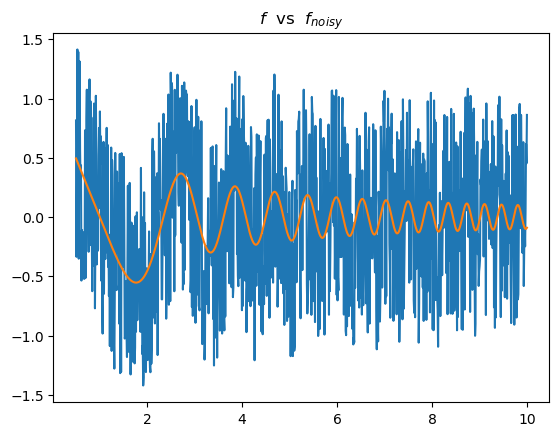

In [91]:
def func(x,lamb):
    return np.sin((x-x**2))/x + lamb*np.random.uniform(low=-1.0, high=1.0, size=x.shape) 
vec = np.linspace(0.5,10,1001)
f = func(vec,0)  
noisy_f = func(vec,1)
plt.plot(vec,noisy_f)
plt.plot(vec,f)
plt.title('$f$  vs  $f_{noisy}$') 
plt.show()


#### b

<function matplotlib.pyplot.show(close=None, block=None)>

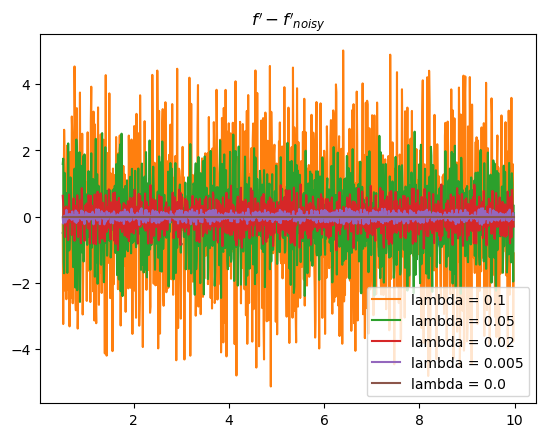

In [84]:
vec = np.linspace(0.5,10,1001)
dx = vec[2:-1] - vec[0:-3]
f = func(vec,0)  
lambda_vec = np.array([0.1,0.05,0.02,0.005,0])
f_tag = (f[2:-1] - f[0:-3])/(2*dx) # Central derivativ
plt.plot(vec[1:-2],f_tag)
for l in lambda_vec:
    noisy_f = func(vec,l)
    noisy_f_tag = (noisy_f[2:-1]-noisy_f[0:-3])/(2*dx)
    label_text = f'lambda = {l}'
    plt.plot(vec[1:-2],noisy_f_tag - f_tag,label=label_text)
plt.legend(loc='lower right')
plt.title("$f' - f'_{noisy}$")

plt.show
        

As one can see, the noise level in the cental derivative inceasing significally with lambda

#### c

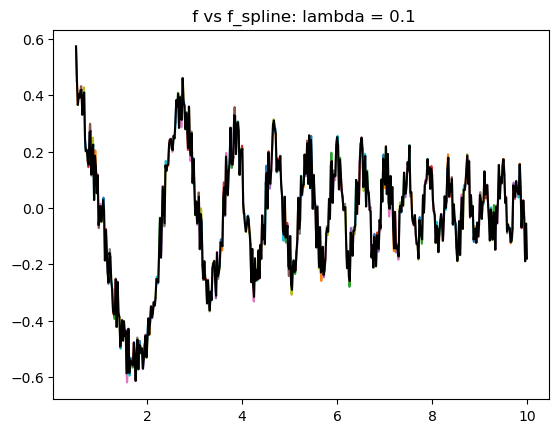

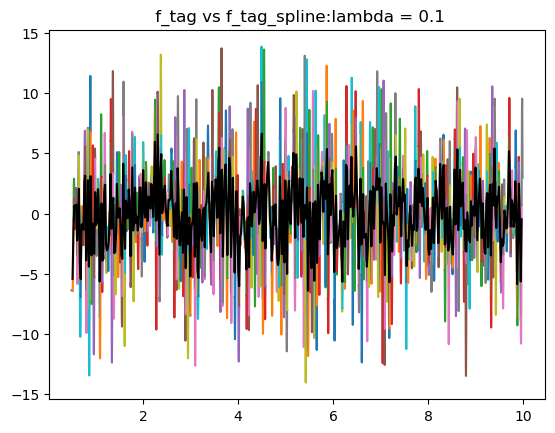

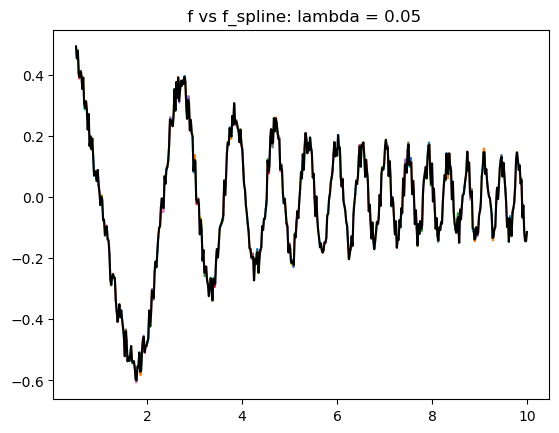

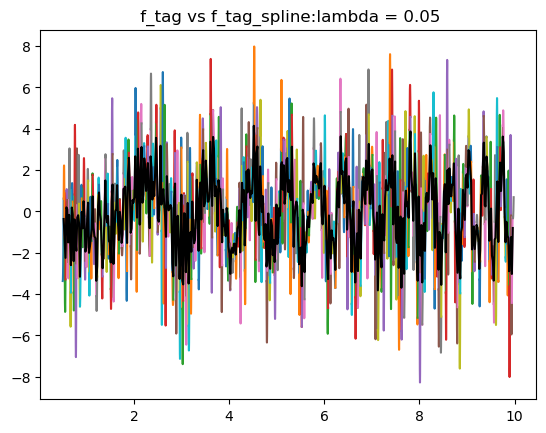

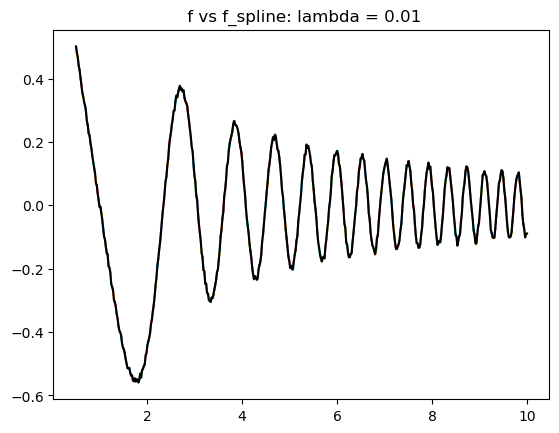

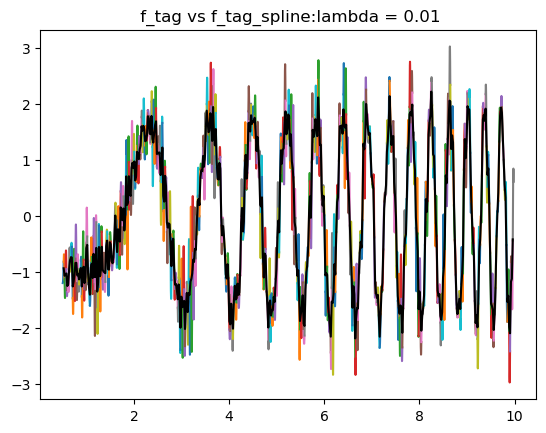

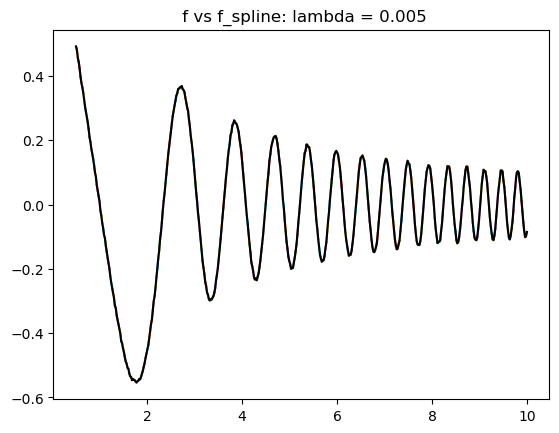

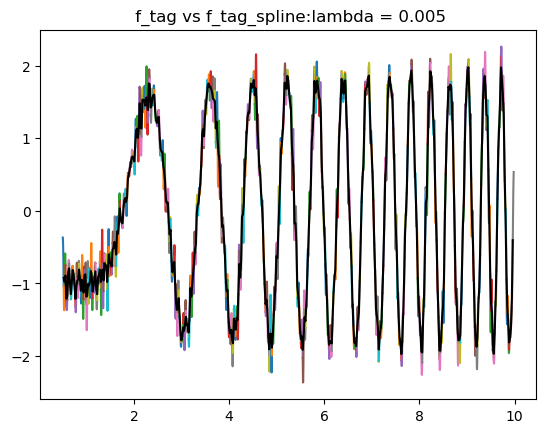

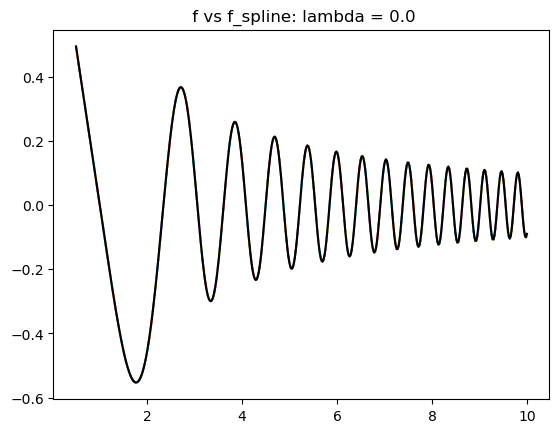

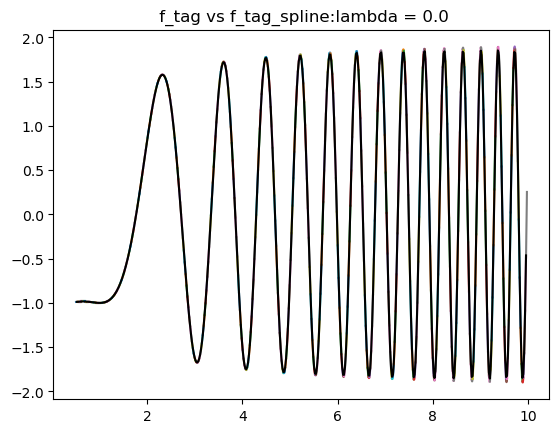

In [93]:
global Delta_x, S_intervals

def func(x,lamb):
    return np.sin((x-x**2))/x + lamb*np.random.uniform(low=-1.0, high=1.0, size=x.shape)

def P_tag_tag_fun (vec,f): # Sloving the A p'' = b set of linear eqautions
    global Delta_x, interval
    
    interval = len(vec)-1 # number of interveal
    Delta_x = (vec[-1] - vec[0])/interval # assuming eqaul intervals
    M_size = interval - 1 # Matrix size
    
    # Main diagonal: [4*dx, 4*dx, ...]
    main_diag = 4 * Delta_x * np.ones(M_size)

    # Off-diagonals (sub and super): [dx, dx, ...]
    off_diag = Delta_x * np.ones(M_size - 1)

    # Build the tridiagonal matrix A
    A = np.diag(main_diag, k=0) +\
        np.diag(off_diag, k=1) + \
        np.diag(off_diag, k=-1)



    # Calculate b vector
    b_inner = f[:-2] - 2 * f[1:-1] + f[2:] 
    b = (6 / Delta_x) * b_inner

    # find p''
    p_tag_tag = np.linalg.solve(A, b)
    p_tag_tag = np.append(np.array(0), p_tag_tag)
    p_tag_tag = np.append(p_tag_tag, np.array(0)) 

    return (p_tag_tag)

def Params_finder (p_tag_tag): # Finding the alph, beta, gammae, eta coefficents
    global Delta_x
    alpha = np.array([]); beta = alpha; gamma = beta; etha = gamma;
    
    for i in range(len(p_tag_tag)-1):
    #print(alpha.shape)
        alpha = np.append(alpha,(p_tag_tag[i+1]/(6*Delta_x)))
        beta = np.append(beta,(-p_tag_tag[i]/(6*Delta_x)))
        gamma = np.append(gamma,(-p_tag_tag[i+1]*Delta_x**2+6*f[i+1])/(6*Delta_x))
        etha = np.append(etha,(p_tag_tag[i]*Delta_x**2-6*f[i])/(6*Delta_x) )

    return alpha, beta, gamma, etha
    

    
    
def f_spline(vec, alpha, beta, gamma, etha): # Genereating the splined function
    global S_intervals
    for s in range(len(vec)-1):
    
        x = np.linspace(vec[s],vec[s+1],S_intervals) # making each interval been "continues"
        
        a = np.array( alpha[s] * (x-vec[s])**3 )
        b = np.array( beta[s]  * (x-vec[s+1])**3 )
        g = np.array( gamma[s] * (x-vec[s]) )
        e = np.array( etha[s]  * (x-vec[s+1]) )
        v_tot = a+b+g+e
        plt.plot(x,v_tot)
        
    
    
def f_tag_spline (vec, alpha, beta, gamma, etha): # Finding the first derivative of the spline
    global S_intervals
    for s in range(len(vec)-1):
    
        x = np.linspace(vec[s],vec[s+1],S_intervals)
        
        a_tag = np.array( alpha[s] * 3* (x-vec[s])**2 )
        b_tag = np.array( beta[s]  * 3*(x-vec[s+1])**2 )
        g_tag = np.array( gamma[s] )
        e_tag = np.array( etha[s] )    
        
        v_tot_tag = a_tag+b_tag+g_tag+e_tag
        plt.plot(x,v_tot_tag)

        

S_intervals = 1001
vec = np.linspace(0.5,10,500)
lambda_vec = np.array([0.1,0.05,0.01,0.005,0])#
for l in lambda_vec:
    f = func(vec,l)  


    p_tag_tag = P_tag_tag_fun (vec,f)
    #print(len(P_tag_tag))
    alpha, beta, gamma, etha = Params_finder (p_tag_tag)
    #print(len(alpha))
    f_spline(vec, alpha, beta, gamma, etha); plt.plot(vec,f,color = 'black')
    plt.title(f' f vs f_spline: lambda = {l}'); plt.show()
#     print(len(f_tag))
    f_tag = (f[2:-1] - f[0:-3])/(2*Delta_x)
    f_tag_spline (vec[0:-1], alpha, beta, gamma, etha); plt.plot(vec[1:-2],f_tag,color = 'black')
    plt.title( f' f_tag vs f_tag_spline:lambda = {l}'); plt.show()
    




#print(p_tag_tag.shape)




# for s in range(len(vec)-1):
    
#     x = np.linspace(vec[s],vec[s+1],1001)
#     a = np.array( alpha[s] * (x-vec[s])**3 )
#     a_tag = np.array( alpha[s] * 3* (x-vec[s])**2 )
    
#     b = np.array( beta[s]  * (x-vec[s+1])**3 )
#     b_tag = np.array( beta[s]  * 3*(x-vec[s+1])**2 )
    
#     g = np.array( gamma[s] * (x-vec[s]) )
#     g_tag = np.array( gamma[s] )
    
#     e = np.array( etha[s]  * (x-vec[s+1]) )
#     e_tag = np.array( etha[s] )
    
    
    
    
    
# #         P_v = np.array([P_v,])
#     v_tot = a+b+g+e
#     v_tot_tag = a_tag+b_tag+g_tag+e_tag
#     #rint(x.shape)
#     plt.plot(x,v_tot)
# plt.plot(vec,f)


### Q3

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import time

##### Bisection

(-1e-05, 1e-05)

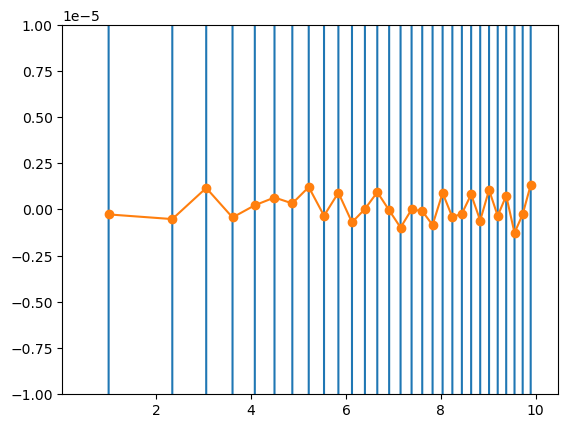

In [95]:
def func(x):
    return np.sin(x-x**2)/x
    
def unique_with_tolerance(vec, tolerance=1e-3):
    
    #Finds unique values in a NumPy vector within a given tolerance.
    sorted_vec = np.sort(vec.flatten())
    differences = np.diff(sorted_vec)
    mask = differences > tolerance
    unique_mask = np.concatenate(([True], mask))
    unique_values = sorted_vec[unique_mask]
    return unique_values


def Bisection_func(intervals,tol = 1e-6):
    vec = np.linspace(0.5,10,intervals)  # Initial interval to span the funtion
    dx = vec[1]-vec[0]
    X_roots = np.array([])
    xm = []
    for i in range (intervals-1): # Start scrolling over the X axis
        xl =  vec[i]; xr = vec[i+1];
        fi  = func(xl)
        fii =  func(xr)
        if fi*fii>0:  # Check if both elements are in the same side, if yes - skip
            #print(0)
            continue
        #print(1)
        xm = (xl+xr)/2 # If not, start to covnerge
        while np.abs((xm-xr or xm-xl))>tol: # sptoping condition over the error in the zero position
            if func(xl)*func(xm)<0: # ittertation in order to get closer around the real zero
                xr = xm
            else:
                xl = xm
            
            xm = (xl+xr)/2
            
        #print(xm)
        X_roots = np.append(X_roots,xm)
        #print(X_roots)
    X_roots = unique_with_tolerance(X_roots,1e-3) # remove duplication
    return X_roots
vec = np.linspace(0.5,10,1001); f = func(vec);

Bisection_Roots = Bisection_func(201)
plt.plot(vec,f); plt.plot(Bisection_Roots,func(Bisection_Roots),marker = "o");plt.show
plt.ylim(-1e-5,1e-5)

#### Newton Raphson

(-1e-12, 1e-12)

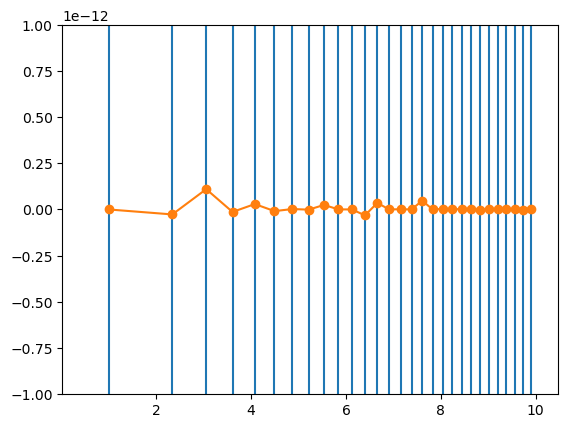

In [96]:
def func(x):
    return np.sin(x-x**2)/x
    
def func_tag_numerical(x,dx):
    return  (func(x+dx) - func(x-dx)) / (2.0 * dx)

def func_tag_analitic(x):
    # print(x)
    return ( (x-2*x**2)*np.cos((x-1)*x) - np.sin(x-x**2) ) / x**2
      
def unique_with_tolerance(vec, tolerance=1e-3):
    
    #Finds unique values in a NumPy vector within a given tolerance.
    sorted_vec = np.sort(vec.flatten())
    differences = np.diff(sorted_vec)
    mask = differences > tolerance
    unique_mask = np.concatenate(([True], mask))
    unique_values = sorted_vec[unique_mask]
    return unique_values


def NR_func(intervals,tol=1e-6):
    vec = np.linspace(0.5,10,intervals) # Spaning the x axis
    X_roots = np.array([])
    
    for i in range(intervals-1):
        dx= vec[i+1]-vec[i] # defining the first dx for the iterations
        x = vec[i]
        f = func(x)
        f_tag = func_tag_analitic (x) # finding the analytical derivative at the point 
        xr = x - f/f_tag
        while np.abs(x-xr)>tol:  # condition on the distance of x from the real zero
            dx= x-xr
            x = xr
            f = func(xr)
            f_tag = func_tag_analitic(xr)
            xr = x - f/f_tag 
            
        if xr<vec[0] or xr>vec[-1]: # check if the function is out of the range
            continue        
            
        # print(f_tag)
        X_roots = np.append(X_roots,xr)
    X_roots = unique_with_tolerance(X_roots, 1e-3) # remove duplications
    return(X_roots)
    

vec = np.linspace(0.5,10,1001); f = func(vec);
Steps = int(201)
NR_Roots = NR_func(Steps)
plt.plot(vec,f); plt.plot(NR_Roots,func(NR_Roots),marker = "o");plt.show
plt.ylim(-1e-12,1e-12)

#### Secant

(-1e-09, 1e-09)

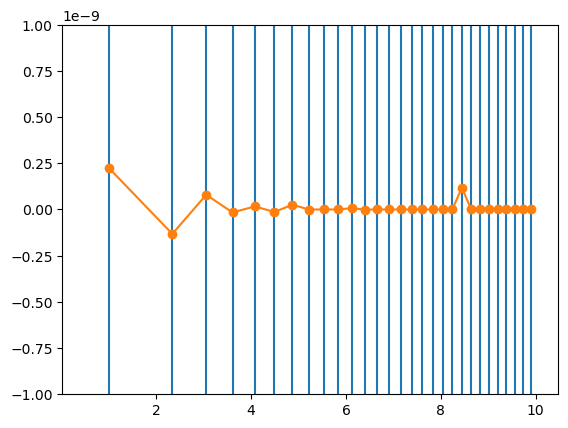

In [60]:
def func(x):
    return np.sin(x-x**2)/x

def unique_with_tolerance(vec, tolerance=1e-3):
    
    #Finds unique values in a NumPy vector within a given tolerance.
    sorted_vec = np.sort(vec.flatten())
    differences = np.diff(sorted_vec)
    mask = differences > tolerance
    unique_mask = np.concatenate(([True], mask))
    unique_values = sorted_vec[unique_mask]
    return unique_values

def Secant_func(intervals,tol=1e-6):
    vec = np.linspace(0.5,10,intervals) # spanning the space
    
    X_roots = np.array([])
    for i in range(intervals-1): # Running over the vector
        dx= vec[i+1]-vec[i]
        x = vec[i]
        x_prev = x+dx/2
        f = func(x)
        x_new = x - func(x) * (x_prev - x) / (func(x_prev) - func(x)) # First test
        
        while np.abs(x_new-x_prev)>tol: # tolerance test
            x_prev = x
            x = x_new
            x_new = x - func(x) * (x_prev - x) / (func(x_prev) - func(x))


            
        if x<vec[0] or x>vec[-1]:
            continue
        
        # if f_tag<1e-10:
        #     continue
            
        # print(f_tag)
        X_roots = np.append(X_roots,x)
        # if len(X_roots)>1 and (np.abs(xr-X_roots[-2])<1e-1) :
        #     X_roots = np.delete(X_roots, -1)
    # print(X_roots)
    X_roots = unique_with_tolerance(X_roots, 1e-3)
    return(X_roots)



vec = np.linspace(0.5,10,1001); f = func(vec);
# plt.plot(vec,f); plt.show()  
Steps = 201
# print(Steps)
Secant_Roots = Secant_func(Steps)
# print(Secant_Roots)
plt.plot(vec,f); plt.plot(Secant_Roots,func(Secant_Roots),marker = "o");plt.show
plt.ylim(-1e-9,1e-9)


#### all together to estimate time

In [75]:
def func(x):
    return np.sin(x-x**2)/x


vec = np.linspace(0.5,10,1001); f = func(vec);
# plt.plot(vec,f); plt.show()  
Steps = int(300)
tol = 1e-6 # tolerance

start_time = time.perf_counter()
Bisection_Roots = Bisection_func(Steps,tol)
end_time = time.perf_counter()
Bisection_time = end_time - start_time
print(f"Bisection time = {Bisection_time:.4e}")

start_time = time.perf_counter()
NR_Roots = NR_func(Steps,tol)
end_time = time.perf_counter()
NR_time = end_time - start_time
print(f"Neuton Raphson time = {NR_time:.4e}")



start_time = time.perf_counter()
Secant_Roots = Secant_func(Steps,tol)
end_time = time.perf_counter()
Secant_time = end_time - start_time
print(f"Secant time = {Secant_time:.4e}")


Bisection time = 3.5761e-03
Neuton Raphson time = 1.2391e-02
Secant time = 2.2068e-02
